# UFO report by < Jennifer : Jat5244 \>
Modify this cell by placing your name and ut eid in the space above. 

## Homework 2
You are a UFO researcher and have just obtained some **TOP SECRET** government data. The data contain sighting information including location, shape and source of the information. Use your pandas skills to investigate the data. Turn in this notebook as your report. Follow the directions and answer the questions. Edit the code cells to create pandas and matplotlib solutions to the questions. The first cell loads the data into a data frame called `df_sightings`. The rest is up to you.

The truth is out there...

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# this cell loads the ufo data (the file should be in the same directory as this notebook)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
filename = '/content/ufo_location_shape.csv'
df_sightings = pd.read_csv(filename)
df_sightings.head()

,Event.Date,Shape,Location,State,Country,Source
0,6/18/16,Boomerang/V-Shaped,South Barrington,IL,USA,NUFORC
1,6/17/16,Boomerang/V-Shaped,Kuna,ID,USA,NUFORC
2,5/30/16,Boomerang/V-Shaped,Lake Stevens,WA,USA,NUFORC
3,5/27/16,Boomerang/V-Shaped,Gerber,CA,USA,NUFORC
4,5/24/16,Boomerang/V-Shaped,Camdenton,MO,USA,NUFORC


## Data Exploration

Answer the following questions about the data in the csv file.  Your answer should be readable, and the only number in the output for the cell.


### Question 1

How many sightings are in the `df_sightings`? 

In [3]:
# Get the total entries
total_sights= df_sightings['Event.Date'].count()
# Print the results
print("Total Sightings Entries: " + str(total_sights))

Total Sightings Entries: 3646


### Question 2 

How many columns are there in the `df_sightings`? 

In [4]:
# Count the length of the columns in dataframe
len(df_sightings.columns)

6

### Question 3

What are the column names?  Format the output such that there is one column name per line.

In [5]:
# df_sightings.columns: you get the column's names in the dataframe

# For loop to print out each column name
for col in df_sightings.columns: 
  print(col)

Event.Date
Shape
Location
State
Country
Source


### Question 4

List the unique countries where sightings occurred. Format the output such that there is one country name  per line. Only list valid countries (invalid country names will be easy to spot). 

You will notice our old friend from the tutorial pop up, `nan`.  By default when you read in a csv file, any of the following values in cells are filled with the numpy `nan` value:  ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘<NA>’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
    
You can drop `nan` from a series using the `dropna` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html). 
    
Use the iterator [iteritems](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iteritems.html) to loop through a series. Use the function [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.drop_duplicates.html) to remove duplicates from a series. 


In [6]:
# Drop the NaN
country = df_sightings['Country'].dropna()

# Remove duplicates
unique_countries = country.drop_duplicates(keep = 'last')

# Convert series to a list
country_list = unique_countries.tolist()

# Remove the invalid country name: South Australia , Unknown 
country_list.remove("South Australia ")
country_list.remove("Unknown ")

# List the unique countries where sightings occurred. Format the output such that there is one country name per line. Only list valid countries
for item in country_list:
  print(item)


Norway 
Wales/UK 
Mauritius 
Dominican Republic 
Gibralter 
Kenya 
Philippines 
Japan 
Netherlands 
Lithuania 
Indonesia 
Portugal 
South Africa 
Brazil 
Chile 
Mexico 
New Zealand 
Pakistan 
The Bahamas (Bermuda triangle) 
Israel 
Iran 
Turkey 
Italy 
Croatia 
Sweden 
Thailand 
Argentina 
China 
Finland 
Australia 
Spain 
Germany 
USA 
India 
Canada 
Ireland 
Cambodia 
England/UK 
Puerto Rico 
Tonga 


### Question 5

For only sightings that occurred in the USA, list the unique state names. Format the output such that there is one US State name per line.

In [7]:
# Get sightings only in the USA
USA_sightings = df_sightings[df_sightings['Country'] == 'USA ']

# Drop NaN 
states_sight = USA_sightings['State'].dropna()

# Drop duplicates 
unique_states = states_sight.drop_duplicates(keep = 'last')

# Convert it into a list
state_list = unique_states.tolist()

# Remove invalid states name : '?? '. 'DC '
state_list.remove('?? ')
state_list.remove('DC ')

# List the unique state names. Format the output such that there is one US State name per line
for state in state_list:
  print(state)


MS 
KY 
OK 
AL 
AR 
MT 
RI 
NM 
WI 
ME 
UT 
KS 
SD 
TN 
HI 
NH 
SC 
IA 
VT 
NV 
MA 
PA 
WA 
CT 
FL 
MN 
NY 
MI 
MO 
GA 
VA 
NE 
ID 
AZ 
NC 
OR 
DE 
AK 
MD 
IL 
TX 
ND 
WY 
CO 
OH 
NJ 
LA 
WV 
CA 
IN 


### Question 6

List the different observed UFO shapes and the number of times that they occur in the data frame (hint see [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html). The answer will be in text format with one type of shape followed by the number of occurances per line. 

In [8]:
# List the different observed UFO shapes and the number of times that they occur in the data frame
df_sightings['Shape'].value_counts()

Lights Only            1023
Circle                  451
Orb/Sphere              347
Triangle                336
Fireball                294
Unknown                 257
Other                   239
Disk                    178
Cigar/Cylinder          138
Oval                    129
Rectangle                68
Diamond                  57
Boomerang/V-Shaped       38
Teardrop                 36
Egg                      19
Cone                     17
Cross                    14
Pyramid                   2
Sphere                    1
Square                    1
Missile/Rocket            1
Name: Shape, dtype: int64

### Question 7

Create a bar chart showing the number of sightings in each country. The x axis should be country and the y axis should be number of sightings.
        
Your axis should be legible, and labeled correctly.

Sort the countries by most sightings, to least sightings.  For the top three countries, annotate the bar chart to show the number of sightings, and adjust the y limits such that you are only showing the detail from 0-16 sightings. 

There are multiple ways to solve this, and I used [figure](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.figure.html) to adjust the size of my plot, [ylim](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.ylim.html) to control the y limits of the histogram, [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) to create the data, [bar](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.bar.html) to chart the data, [xticks](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks) to set the tick labels, [arrange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) to create x coordinates for the countries and control the tick locations, [text](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.text.html) to annotate the graph for the top three country sighting counts, and [ylabel](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.ylabel.html) [title](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.title.html) to set the ylabel and title of the plot.  

(0.0, 16.0)

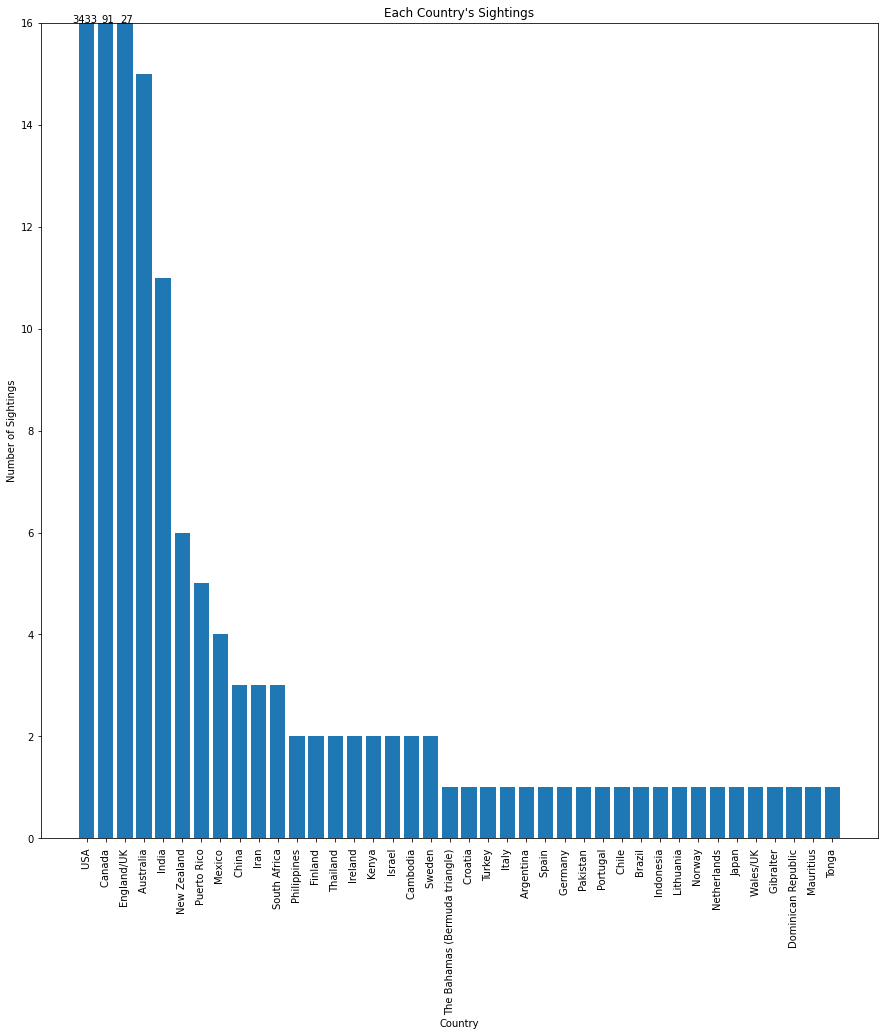

In [9]:
# Create the data; number of sightings in each country
country_sights = dict(df_sightings['Country'].value_counts())

# Delete invalid countries: South Australia , Unknown 
country_sights.pop('South Australia ')
country_sights.pop('Unknown ')

# Adjust the size of my plot, to make axis legible
plt.rcParams["figure.figsize"] = (15, 15)

# Plot the bar graph
country_bar = plt.bar(country_sights.keys(), country_sights.values(), align = 'center')

# Label the graph
plt.title("Each Country\'s Sightings")
plt.xlabel('Country')
plt.ylabel('Number of Sightings')
plt.xticks(rotation = 90, fontsize = 10)

# Annotate the graph for the top three country sighting counts
plt.text(-0.75, 16, '3433') # USA - 3433
plt.text(0.75, 16, '91') # Canada - 91
plt.text(1.75, 16, '27') # England/UK - 27

# Adjust the y limits such that you are only showing the detail from 0-16 sightings
plt.ylim(0,16)

### Question 8

Create a stacked bar chart showing the top 7 UFO shapes for the ten states with the highest number of sightings. Start by finding the ten states with the highest number of sightings. Given those 10 states, find the top 7 most frequent UFO shapes. Then for each state plot a stacked bar where each color of the stack corresponds to the number of sightings in that state for a particular UFO shape. Label the x-axis with the State abbreviation. 

There is an [example](https://matplotlib.org/3.2.2/gallery/lines_bars_and_markers/bar_stacked.html) of a stacked bar chart available in the documentation. 

Use the color brewer website from the class slides to pick 7 colors to override the matplotlib defaults for the bars.

In [10]:
# USA = df_sightings.groupby('Country').size()
USA = df_sightings[df_sightings['Country'] == 'USA '] # Filtered dataframe for USA
USA

,Event.Date,Shape,Location,State,Country,Source
0,6/18/16,Boomerang/V-Shaped,South Barrington,IL,USA,NUFORC
1,6/17/16,Boomerang/V-Shaped,Kuna,ID,USA,NUFORC
2,5/30/16,Boomerang/V-Shaped,Lake Stevens,WA,USA,NUFORC
3,5/27/16,Boomerang/V-Shaped,Gerber,CA,USA,NUFORC
4,5/24/16,Boomerang/V-Shaped,Camdenton,MO,USA,NUFORC
...,...,...,...,...,...,...
3625,6/10/75,Unknown,Millville,NJ,USA,NUFORC
3626,10/6/74,Unknown,New Orleans,LA,USA,NUFORC
3627,5/1/74,Unknown,Philippi,WV,USA,NUFORC
3628,8/31/71,Unknown,Los Banos,CA,USA,MUFON


In [11]:
# Find out the largest top 10 states sightings
states = USA['State'].value_counts().nlargest(10)

# turn it into a dict
states_dict = dict(states)

# get the states into a list
states_list = list(states_dict.keys())
states_list

['CA ', 'FL ', 'AZ ', 'WA ', 'NY ', 'NC ', 'PA ', 'CO ', 'IL ', 'OR ']

In [12]:
# Filtering the dataframe more with the condition of the top 10 states
new_states = USA[USA.State.isin(['CA ', 'FL ', 'AZ ', 'WA ', 'NY ', 'NC ', 'PA ', 'CO ', 'IL ', 'OR '])]

# dropping other columns: event.date, location, country and course
new_states.drop(['Event.Date', 'Location', 'Country', 'Source'], axis = 1, inplace = True)
new_states

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Shape,State
0,Boomerang/V-Shaped,IL
2,Boomerang/V-Shaped,WA
3,Boomerang/V-Shaped,CA
5,Boomerang/V-Shaped,FL
11,Boomerang/V-Shaped,AZ
...,...,...
3614,Unknown,OR
3618,Unknown,IL
3619,Unknown,CA
3623,Unknown,CO


In [13]:
# Find out the top 7 UFO shapes for the ten states
state_shapes = USA['Shape'].value_counts().nlargest(7)

# turn it into a dict
shapes_dict = dict(state_shapes)

# get the states into a list
shape_list = list(shapes_dict.keys())
shape_list

['Lights Only ',
 'Circle ',
 'Orb/Sphere ',
 'Triangle ',
 'Fireball ',
 'Unknown ',
 'Other ']

In [14]:
# Filtering out the dataframe more for the 7 most common shapes
new_states_shape = new_states[new_states.Shape.isin(['Lights Only ', 'Circle ', 'Orb/Sphere ',
                                                     'Triangle ', 'Fireball ', 'Unknown ', 'Other '])]
new_states_shape

,Shape,State
178,Circle,OR
179,Circle,CO
181,Circle,NY
195,Circle,NC
196,Circle,CA
...,...,...
3614,Unknown,OR
3618,Unknown,IL
3619,Unknown,CA
3623,Unknown,CO


In [15]:
# Grouping it by state and counting each shape or size
grouped_state_shapes = new_states_shape.groupby(['State', 'Shape']).size()
grouped_state_shapes

State  Shape       
AZ     Circle          12
       Fireball         9
       Lights Only     68
       Orb/Sphere      17
       Other           13
                       ..
WA     Lights Only     50
       Orb/Sphere      20
       Other            9
       Triangle        12
       Unknown         12
Length: 70, dtype: int64

Text(0, 0.5, 'Number of Sightings')

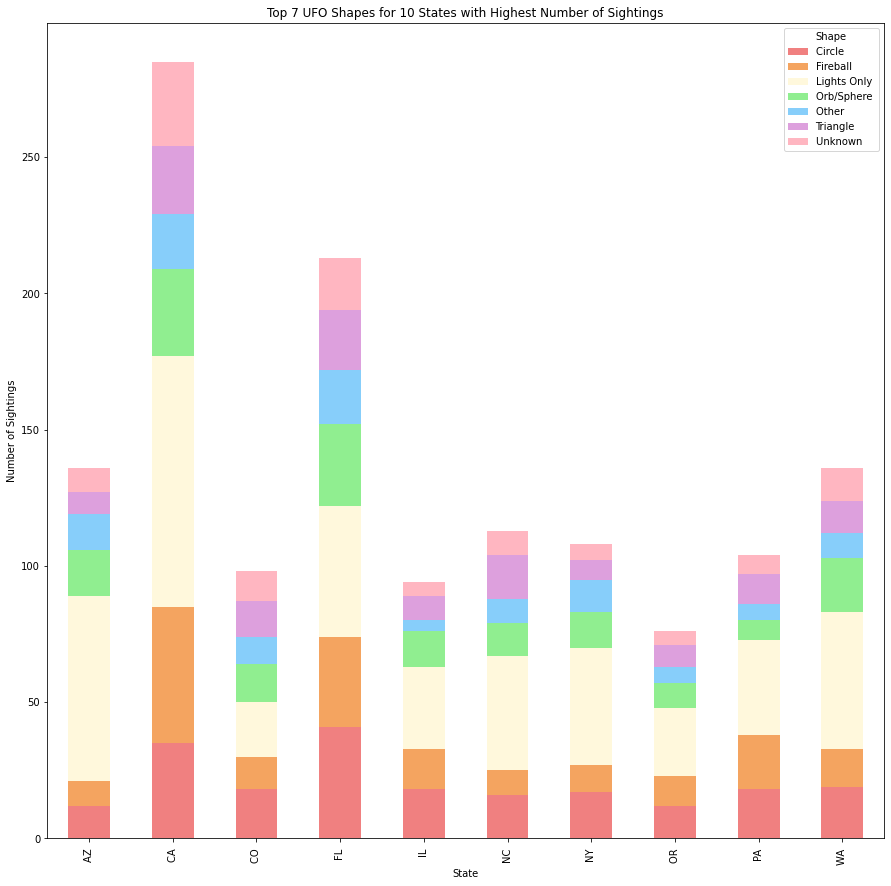

In [16]:
# Then for each state plot a stacked bar where each color of the stack corresponds to the number of sightings in that state for a particular UFO shape. 
# Label the x-axis with the State abbreviation.
new_colors = ['lightcoral', 'sandybrown','cornsilk', 'lightgreen','lightskyblue','plum','lightpink']
grouped_state_shapes.unstack().plot(kind='bar', color = new_colors, stacked=True)

# Label the graph
plt.title("Top 7 UFO Shapes for 10 States with Highest Number of Sightings")
plt.ylabel('Number of Sightings')